# Glycine 
- [basic test](#Basic-test) 
    - [diffraction pattern](#Diffraction-pattern-for-Glycine-frame-19)
    - [padding study](#Padding-study)
- [Comparison with experiment](#Comparing-with-experimental-data)
    - [diffraction patterns vs exp](#Glycine-exp-vs-simulated-patterns)
- [Pets interface](#Pets-interface)

In [1]:
import importlib as imp
import multislice.multislice as mupy;imp.reload(mupy)       # the temsim wrapper module
import multislice.postprocess as pp ;imp.reload(pp)         # postprocess module
import multislice.mupy_utils as mut ;imp.reload(mut)        # multislice utilities
from utils import*                         # utilities
from ipywidgets import interact, interactive, fixed, interact_manual
# %matplotlib notebook
path = 'data/glycine/'
cif_file = path+'alpha_glycine.cif'

using dpi=96
using screenszie=[20.0,11.25] inches
using dpi=96
using screenszie=[20.0,11.25] inches
using dpi=96
using screenszie=[20.0,11.25] inches
using dpi=96
using screenszie=[20.0,11.25] inches
using dpi=96
using screenszie=[20.0,11.25] inches
using dpi=96
using screenszie=[20.0,11.25] inches
using dpi=96
using screenszie=[20.0,11.25] inches


## Basic test
### Example frame 19
The test is performed from the orientation of the experimental diffraction pattern 19. 

coords file saved : 
data/glycine/alpha_glycine.xyz


/home/lii26466/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


binary coords file saved :data/glycine/alpha_glycine.npy
number of coordinates = 1168560
number of unit cells  = 29214


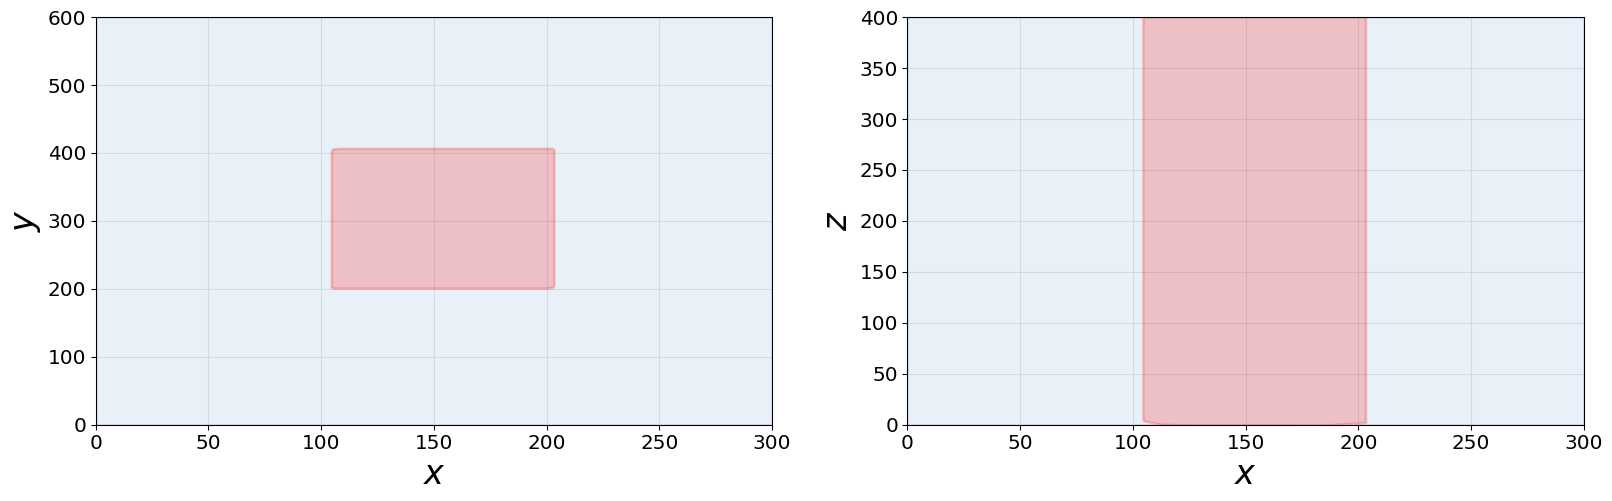

In [16]:
xyz = 'alpha_glycine_test.xyz'
n = array([0.86956126,-11.24280557,-0.34604196])
mut.gen_xyz2(cif_file,n=n,theta=0,lat_params=[100,200,100],pad=0.5,xyz=path+xyz)
mut.show_grid(path+xyz,opts=['xy','xz'],popts='h')

In [102]:
crys  = mut.import_crys(file)
crys.lattice_parameters

(4.9669, 11.459, 5.4231, 90.0, 114.91599999999998, 90.0)

In [20]:
args = {'name':path,'mulslice':False,'data':xyz,'keV':200,'i_slice':10,
             'repeat':[1,1,1],'NxNy':4096,'slice_thick':1.0,'Nhk':1}
multi = mupy.Multislice(tag='test', opt='srfp',ppopt='s',ssh='badb',**args)

Simu name pattern = glycine_0_autoslic
ax=300.000A, by=600.000, cz= 400.0
simulated thickness = 400.000 A, nslices=400
Decks saved :
/data3/lii26466/multislice/glycine/glycine_0_autoslic.in
object saved
/data3/lii26466/multislice/glycine/glycine_0_autoslic.pkl
Simulation already performed in the past.
Force re-running
/data3/lii26466/multislice/glycine/glycine_0_autoslic.sh

glycine_0_autoslic job submitted at Tue May  4 14:26:06 2021
...postprocessing...
scp: /data3/lii26466/multislice/glycine/glycine_0_autoslic.log: No such file or directory

not started
scp: /data3/lii26466/multislice/glycine/glycine_0_autoslic.log: No such file or directory

not started
init
init
init
0%
0%
0%
0%
2%
2%
2%
5%
5%
5%
5%
7%
7%
7%
9%
9%
9%
12%
12%
12%
12%
14%
14%
14%
17%
17%
17%
17%
19%
19%
19%
19%
22%
22%
22%
24%
24%
24%
24%
27%
27%
27%
29%
29%
29%
29%
32%
32%
32%
34%
34%
34%
34%
37%
37%
37%
37%
39%
39%
39%
42%
42%
42%
42%
44%
44%
44%
47%
47%
47%
47%
49%
49%
49%
52%
52%
52%
52%
54%
54%
54%
57%
57%
57%


KeyboardInterrupt: 

In [46]:
multi = pp.load(path,tag='0',v=1)#;multi.print_log()

loading data/glycine/glycine_0_autoslic.pkl
simu status :  done


loading /data3/lii26466/multislice/glycine/glycine_0_autoslic_pattern004.npy at z=40.0A
Gaussian window function size :  4 4
displaying pattern: (1024, 1024)


<IPython.core.display.Javascript object>


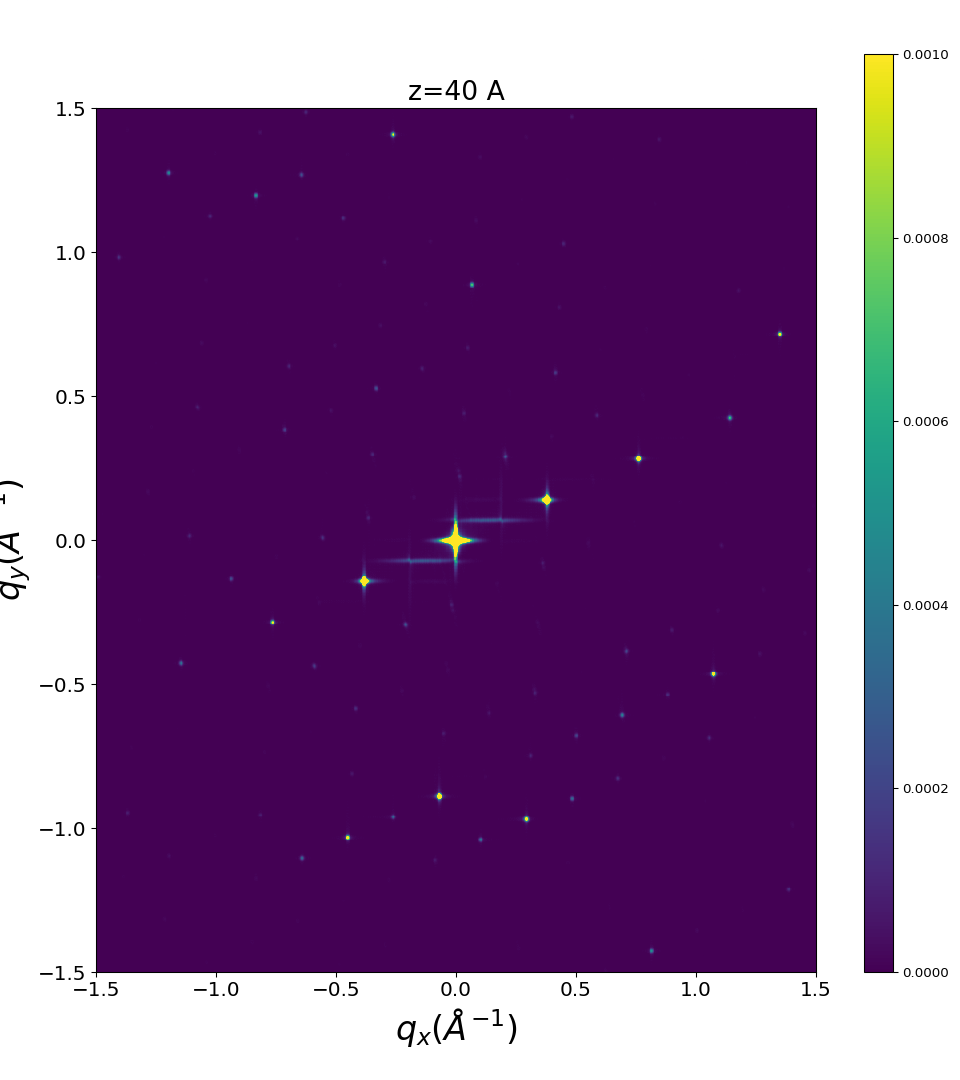

Saving figure :
figures/glycine19.png


In [54]:
pargs = {'Iopt':'csng','Imax':5e4,'gs':0.015,'rmax':25,'Nmax':512,'xylims':1.5,'cmap':'viridis'}
multi.pattern(iz=4,v=1,caxis=[0,1e-3],name='figures/glycine19.png',opt='ps',**pargs);
# multi.patterns2gif(**pargs,caxis=[0,1e-5])

loading /data3/lii26466/multislice/glycine/glycine_0_autoslic_pattern020.npy at z=200.0A
Gaussian window function size :  4 4


<IPython.core.display.Javascript object>


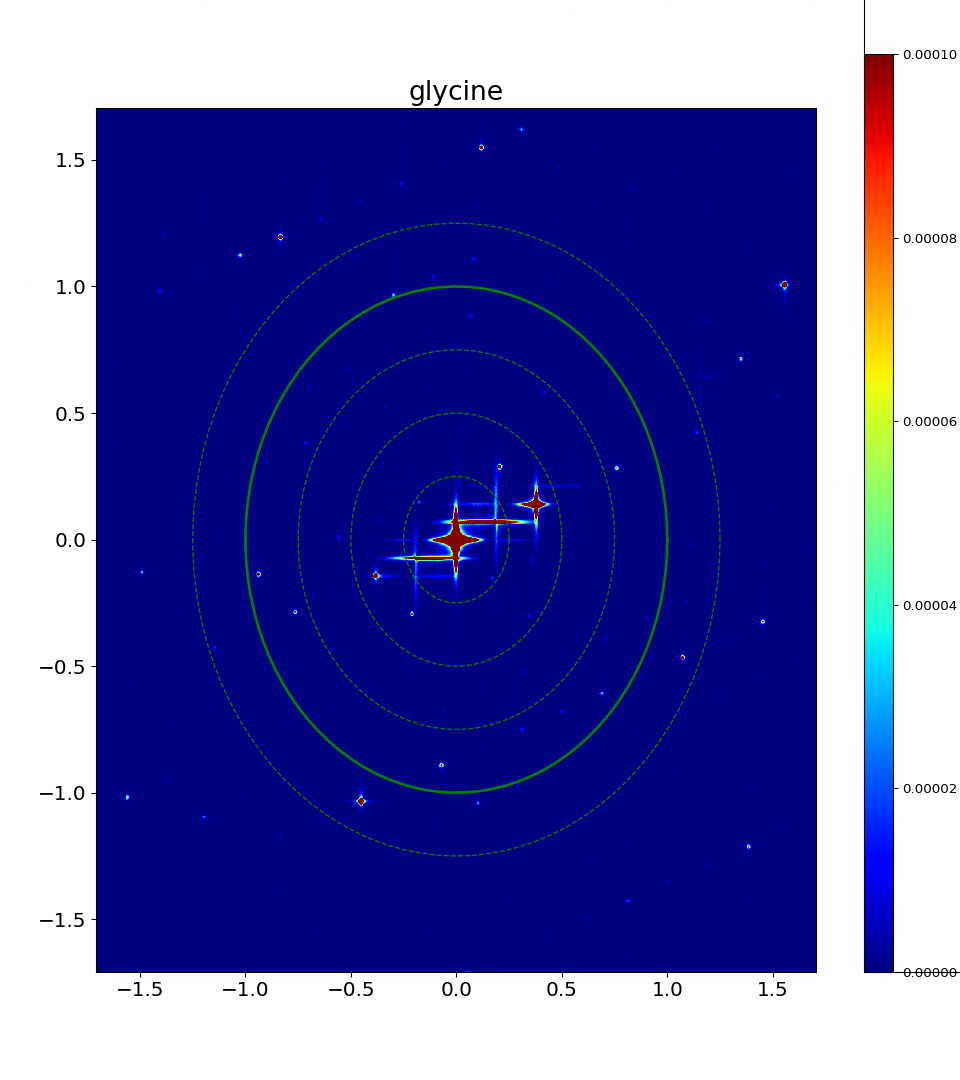

interactive(children=(Text(value='0.001', description='x'), Output()), _dom_classes=('widget-interact',))

In [44]:
# %matplotlib notebook
iz=20
# multi.save_pattern(iz)
pargs = {'Iopt':'csng','gs':0.015,'rmax':25,'Nmax':512,'rings':[1],'xylims':1.2,'cmap':'viridis'}
qx,qy,im0 = multi.pattern(iz=iz,out=1,lw=3,**pargs);
t = np.linspace(0,2*np.pi,100)
ct,st = np.cos(t),np.sin(t)
plts = [[r*ct,r*st,'g--','',1] for r in np.arange(0.25,1.5,0.25)]
plts+= [[r*ct,r*st,'g-','',2] for r in range(1,2)]
fig,ax = dsp.create_fig()
def faxis(x):
    print('vmax=',float(x))
    ax.cla();dsp.stddisp(plts,ax=ax,fig=fig,im=[qx,qy,im0],title='glycine',pOpt='im',caxis=[0,float(x)])
    print('ok')
interact(faxis, x="0.001");

### Diffraction pattern for Glycine frame 19 

exp | multislice
--- | ---------
[![](figures/pattern_19.png)](figures/pattern_19.png) | ![](figures/glycine19.png)

<!-- Thickness dependent diffraction pattern gif   -->

<!-- gif | pattern -->
<!-- --- | ------ -->
<!-- ![](data/glycine/figures/glycine_0_autoslic_pattern.gif) | ![](figures/glycine19.png) -->

### Padding study


In [ ]:
pads,lats = np.meshgrid([0.5,1,2],[50,100,200])
pads,lats = pads.flatten(),lats.flatten()
for pad,lat in zip(pads,lats):
    

## Comparing with experimental data
### Example on multiple frames
A $20\times20$ crystal is considered although due to orienting the crystal it is not possible to garantee the exact number. 

In [94]:
frames = np.arange(1,65) #[5,10,15,25,30]
df = pd.DataFrame(frames,columns=['frame'])
uvw = np.load(path+'uvw.npy')

df['uvw']=[u for u in uvw]
for f,n in zip(frames,uvw):
    xyz = 'alpha_glycine_test%d.xyz' %f
    mut.gen_xyz2(cif_file,n=n,theta=0,lat_params=[100,100,100],pad=0.5,xyz=path+xyz)
#     mut.show_cell(cif_file,n=n,bopt=1,x0=None,rep=[1,1,1])
    # mut.show_grid(path+xyz,opts=['xy','xz'],popts='h')

coords file saved : 
data/glycine/alpha_glycine_test1.xyz
binary coords file saved :data/glycine/alpha_glycine_test1.npy
number of coordinates = 143120
number of unit cells  = 3578


/home/lii26466/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


coords file saved : 
data/glycine/alpha_glycine_test2.xyz
binary coords file saved :data/glycine/alpha_glycine_test2.npy
number of coordinates = 142800
number of unit cells  = 3570
coords file saved : 
data/glycine/alpha_glycine_test3.xyz
binary coords file saved :data/glycine/alpha_glycine_test3.npy
number of coordinates = 142920
number of unit cells  = 3573
coords file saved : 
data/glycine/alpha_glycine_test4.xyz
binary coords file saved :data/glycine/alpha_glycine_test4.npy
number of coordinates = 142920
number of unit cells  = 3573
coords file saved : 
data/glycine/alpha_glycine_test5.xyz
binary coords file saved :data/glycine/alpha_glycine_test5.npy
number of coordinates = 142680
number of unit cells  = 3567
coords file saved : 
data/glycine/alpha_glycine_test6.xyz
binary coords file saved :data/glycine/alpha_glycine_test6.npy
number of coordinates = 142720
number of unit cells  = 3568
coords file saved : 
data/glycine/alpha_glycine_test7.xyz
binary coords file saved :data/glycin

coords file saved : 
data/glycine/alpha_glycine_test41.xyz
binary coords file saved :data/glycine/alpha_glycine_test41.npy
number of coordinates = 143000
number of unit cells  = 3575
coords file saved : 
data/glycine/alpha_glycine_test42.xyz
binary coords file saved :data/glycine/alpha_glycine_test42.npy
number of coordinates = 142360
number of unit cells  = 3559
coords file saved : 
data/glycine/alpha_glycine_test43.xyz
binary coords file saved :data/glycine/alpha_glycine_test43.npy
number of coordinates = 141960
number of unit cells  = 3549
coords file saved : 
data/glycine/alpha_glycine_test44.xyz
binary coords file saved :data/glycine/alpha_glycine_test44.npy
number of coordinates = 141520
number of unit cells  = 3538
coords file saved : 
data/glycine/alpha_glycine_test45.xyz
binary coords file saved :data/glycine/alpha_glycine_test45.npy
number of coordinates = 141360
number of unit cells  = 3534
coords file saved : 
data/glycine/alpha_glycine_test46.xyz
binary coords file saved :

In [97]:
args = {'name':path,'mulslice':False,'keV':200,'i_slice':10,
             'repeat':[1,1,1],'NxNy':4096,'slice_thick':1.0,'Nhk':1}
frames=np.arange(1,10)#[5,10,15,25,30])
for f in zip(frames):
    xyz = 'alpha_glycine_test%d.xyz' %f
    mupy.Multislice(tag='test%d' %f,data=xyz, opt='srfp',ppopt='s',ssh='badb',**args);

Simu name pattern = glycine_test1_autoslic
ax=200.000A, by=200.000, cz= 100.0
simulated thickness = 100.000 A, nslices=100
Decks saved :
/data3/lii26466/multislice/glycine/glycine_test1_autoslic.in
object saved
/data3/lii26466/multislice/glycine/glycine_test1_autoslic.pkl
/data3/lii26466/multislice/glycine/glycine_test1_autoslic.sh

glycine_test1_autoslic job submitted at Thu May 13 23:09:53 2021
...postprocessing...
scp: /data3/lii26466/multislice/glycine/glycine_test1_autoslic.log: No such file or directory

not started
Simu name pattern = glycine_test2_autoslic
ax=200.000A, by=200.000, cz= 100.0
simulated thickness = 100.000 A, nslices=100
Decks saved :
/data3/lii26466/multislice/glycine/glycine_test2_autoslic.in
object saved
/data3/lii26466/multislice/glycine/glycine_test2_autoslic.pkl
/data3/lii26466/multislice/glycine/glycine_test2_autoslic.sh

glycine_test2_autoslic job submitted at Thu May 13 23:09:54 2021
...postprocessing...
scp: /data3/lii26466/multislice/glycine/glycine_tes

In [96]:
frames=np.arange(1,65)#[5,10,15,25,30])
m = np.zeros(frames.shape,dtype=object)
pargs = {'Iopt':'csngt','Imax':5e4,'gs':0.015,'rmax':25,'Nmax':512,'xylims':1.5,'cmap':'viridis'}
for i,f in enumerate(frames):
    m[i] = pp.load(path,'test%d' %f,v=1)
#     m[i].pattern(opt='c',caxis=[0,1e-3],name='figures/glycine_test%d.png' %f,**pargs)

loading data/glycine/glycine_test1_autoslic.pkl
simu status :  0
loading data/glycine/glycine_test2_autoslic.pkl
simu status :  0
loading data/glycine/glycine_test3_autoslic.pkl
simu status :  0
loading data/glycine/glycine_test4_autoslic.pkl
simu status :  0
loading data/glycine/glycine_test5_autoslic.pkl
simu status :  done
loading data/glycine/glycine_test6_autoslic.pkl
simu status :  0
loading data/glycine/glycine_test7_autoslic.pkl
simu status :  0
loading data/glycine/glycine_test8_autoslic.pkl
simu status :  0
loading data/glycine/glycine_test9_autoslic.pkl
simu status :  0
loading data/glycine/glycine_test10_autoslic.pkl
simu status :  done
loading data/glycine/glycine_test11_autoslic.pkl
simu status :  0
loading data/glycine/glycine_test12_autoslic.pkl
simu status :  0
loading data/glycine/glycine_test13_autoslic.pkl
simu status :  0
loading data/glycine/glycine_test14_autoslic.pkl
simu status :  0
loading data/glycine/glycine_test15_autoslic.pkl
simu status :  done
loading da

### Glycine exp vs simulated patterns 

05 | 10 | 15 | 25 | 30
-- | -- | -- | -- | --
![](figures/glycine_test5.png) | ![](figures/glycine_test10.png) | ![](figures/glycine_test15.png) | ![](figures/glycine_test25.png) | ![](figures/glycine_test30.png)
![](figures/glycine_exp5.png) | ![](figures/glycine_exp10.png) | ![](figures/glycine_exp15.png) | ![](figures/glycine_exp25.png) | ![](figures/glycine_exp30.png)


## Pets interface
From the outputs produced by pets, the `pets` module can be used as a python interface.

The full path of the PETS2 configuration file (**.pts** file) must be specified.The containing folder should also contain the output from pets.

The experimental frames if available can immediately be visualized with `show_exp` (the interactivity of the figure does not work well with jupyter).

tiff format detected


<IPython.core.display.Javascript object>


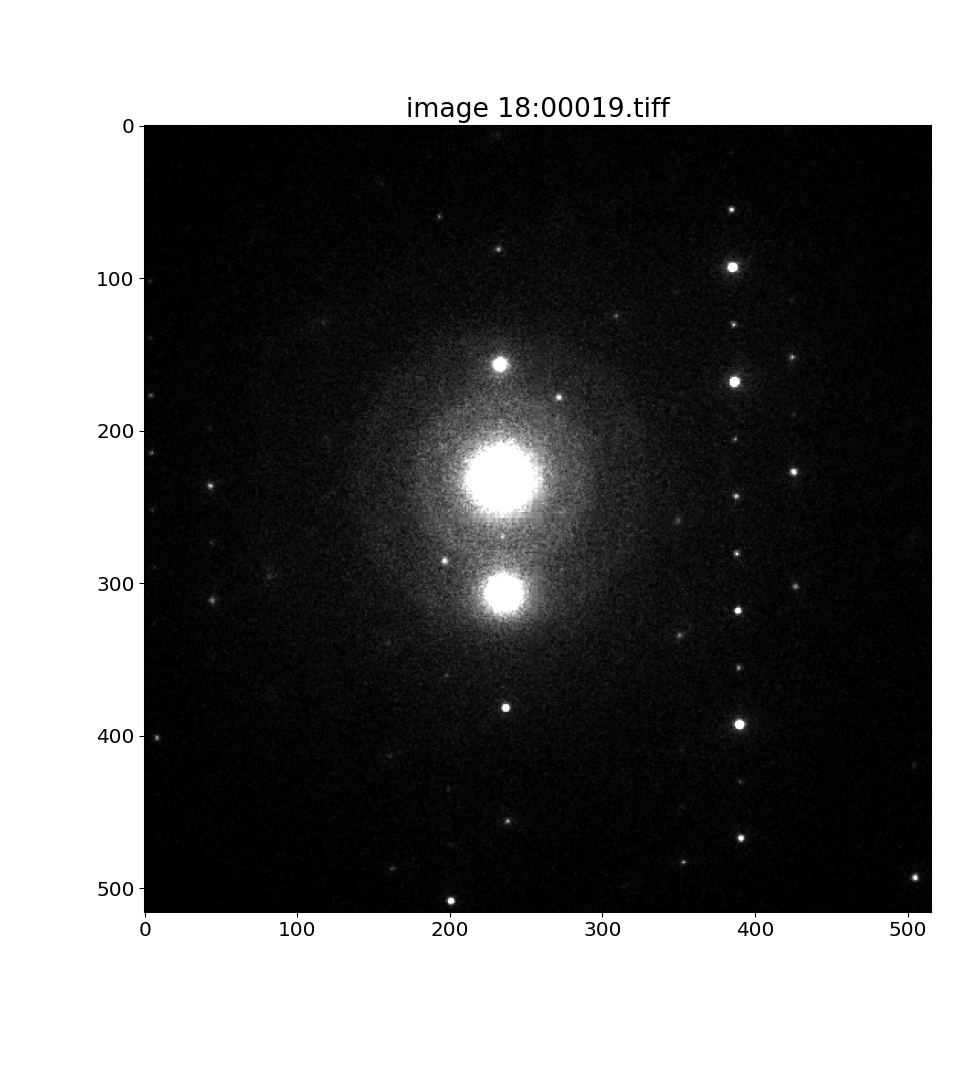

/data3/lii26466/multislice/glycine/pets/tiff/00019.tiff
shortcuts : 
    'up or right'  : show frame+1
    'down or left' : show frame-1
    #
    'p' : increase increment rate
    'm' : decrease increment rate
    ##
    'pageup'   : increae cutoff brightness
    'pagedown' : decrease cutoff brightness
    'r'        : reset cutoff brightness
    ###
    's' : save image
    'h' : show help
        


In [3]:
from multislice import pets as pets
%matplotlib notebook
pets = pets.Pets('data/glycine/pets/glycine.pts')
pets.show_exp(frame=19);

### Retrieving the experimental orientation 

#### Theory

Following [dials convention](https://dials.github.io/documentation/conventions.html), the following relationship holds in cartesian reciprocal space : 

$$\mathbf r_{\phi} = \mathbf R\mathbf A\mathbf h$$

where $\mathbf R$ is the rotation matrix, $\mathbf A=\mathbf U\mathbf B$ the crystal orientation matrix for a rotation of $0^{\circ}$ and 
$\mathbf h=h\mathbf a^{*}+k\mathbf b^{*}+l\mathbf c^{*}$.


#### Diffraction patterns to reciprocal space

The reflections from diffraction patterns are converted from each 2D plane into cartesian reciprocal space from : 

$$\mathbf r_{\phi}=\mathbf D \left(\mathbf p_{xy} - \mathbf c_{xy}\right)a_{px}$$

where $\mathbf D$ is the lab coordinate matrix, $\mathbf p_{xy}$ are the pixel positions of the reflections,  $\mathbf c_{xy}$ is the pixel position of the central beam, and $a_{px}=p_x/\lambda D$ the reciprocal aperture per pixel.

#### Indexing 

The miller indices are obtained from the indexing matrix $\mathbf A^{-1}$ :

$$\mathbf h = \mathbf A^{-1}\mathbf r_{lp}$$

#### Using the output from pets

<IPython.core.display.Javascript object>


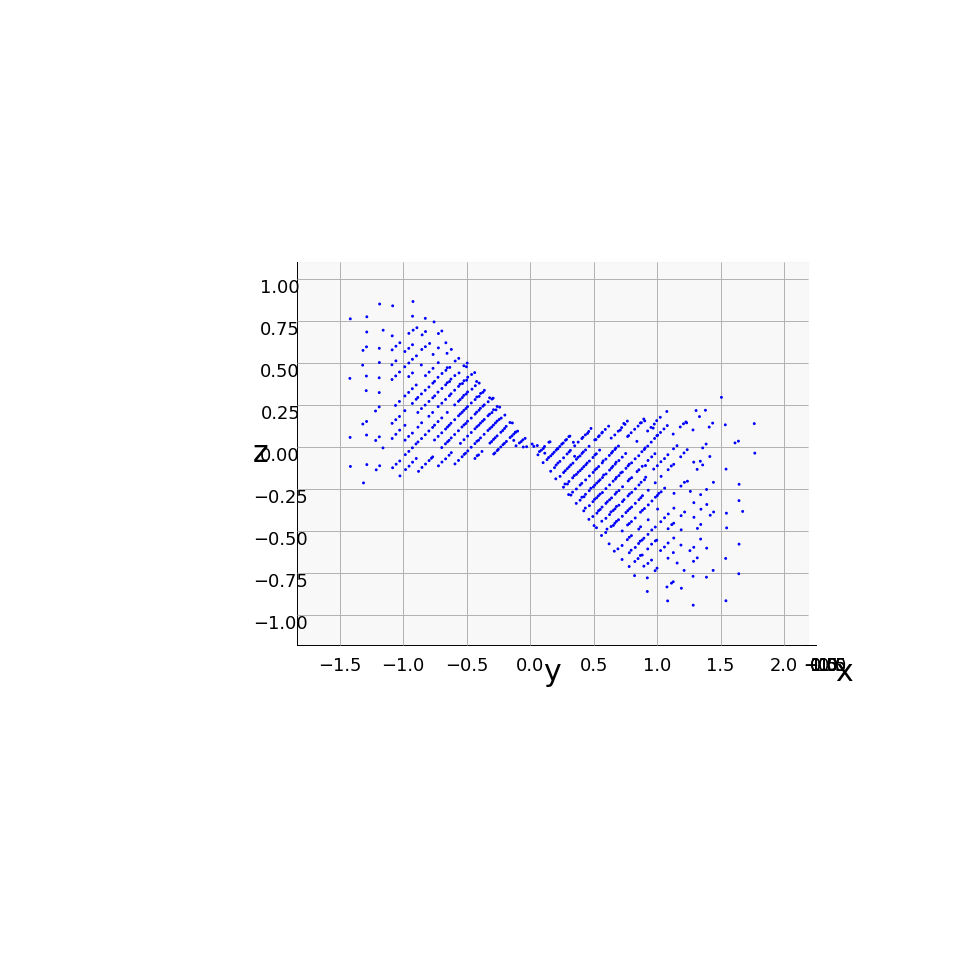

setting persp_transformation as orthogonal


In [5]:
pets.show_xyz()

crystal rotation Orientation [x](figures/x.mp4), [y](figures/y.mp4) , [z](figures/z.mp4).

<!-- jupyter | pets -->
<!-- ------- | ----- -->
<!-- ![](figures/glycine_orient.png) | ![](figures/glycine_pets_orient.png) -->
